In [198]:
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [241]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import get_dummies, concat, read_csv
from matplotlib.pyplot import hist, show, boxplot, subplots
from numpy import arange, argmax
from sklearn.neural_network import MLPClassifier

def make_one_hot(data, field):
    temp = get_dummies(data[field], prefix=field)
    data.drop(field, axis=1, inplace=True)
    return concat([data, temp], axis=1)

In [242]:
data = read_csv('train.csv')
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [243]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [244]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [245]:
def double_bar(group1, group2, title1, title2, labels):
    x = arange(len(labels))
    width = 0.35
    fig, ax = subplots()
    rects1 = ax.bar(x - width / 2, group1, width, label=title1)
    rects2 = ax.bar(x + width / 2, group2, width, label=title2)
    ax.set_ylabel('Count')
    ax.set_title('Counts by group')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    show()

In [246]:
def separeate_by_label(col):
    val_cnt = data[col].value_counts()
    labels, survived, not_survived = [], [], []
    for k in val_cnt.keys():
        labels.append(k)
        survived.append(data[(data.Survived == 1) & (data[col] == k)].shape[0])
        not_survived.append(data[(data.Survived == 0) & (data[col] == k)].shape[0])
    return survived, not_survived, labels

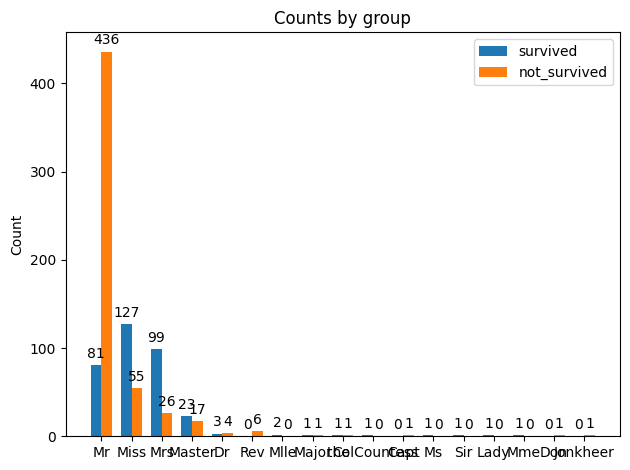

In [247]:
data['Name'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip()) 
survived, not_survived, labels = separeate_by_label('Name')
double_bar(survived, not_survived, 'survived', 'not_survived', labels)

In [248]:
for x in ['Mlle','Major','Col','the Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer']:
    data['Name'] = data['Name'].replace(x, 'others')
print(data['Name'].value_counts())
data = make_one_hot(data, 'Name')

Name
Mr        517
Miss      182
Mrs       125
Master     40
others     14
Dr          7
Rev         6
Name: count, dtype: int64


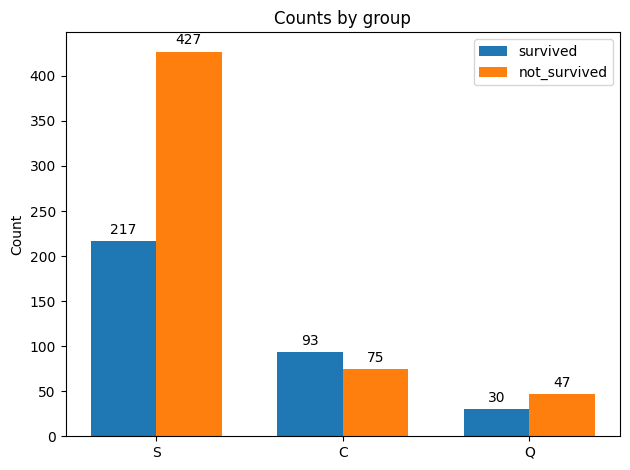

In [249]:
survived, not_survived, labels = separeate_by_label('Embarked')
double_bar(survived, not_survived, 'survived', 'not_survived', labels)

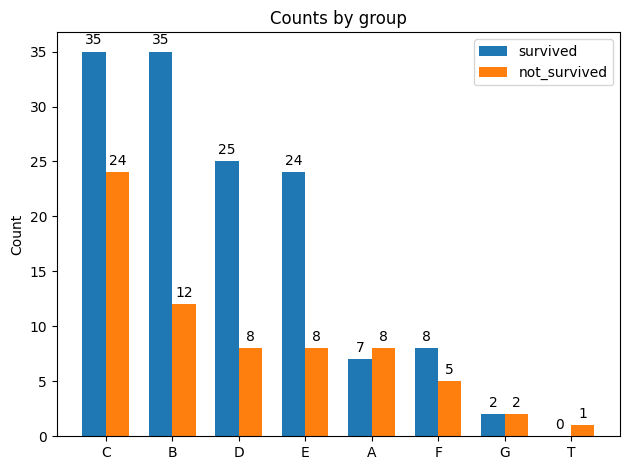

In [250]:
data.Cabin = data[data.Cabin.notnull()]['Cabin'].map(lambda c: c[0])
survived, not_survived, labels = separeate_by_label('Cabin')
double_bar(survived, not_survived, 'survived', 'not_survived', labels)

In [251]:
data.drop(data[data.Cabin == 'T'].index, axis=0, inplace=True)
data.Cabin.value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [252]:
data.drop(data[data.Embarked.isnull()].index, inplace=True)
data.Embarked.isnull().sum()
data = make_one_hot(data, 'Embarked')

In [253]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_others,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,NaN,False,False,False,True,False,False,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,NaN,False,False,True,False,False,False,False,False,False,True
3,1,1,female,35.0,1,0,53.1000,C,False,False,False,False,True,False,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,NaN,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,False,False,False,False,False,True,False,False,False,True
887,1,1,female,19.0,0,0,30.0000,B,False,False,True,False,False,False,False,False,False,True
888,0,3,female,NaN,1,2,23.4500,NaN,False,False,True,False,False,False,False,False,False,True
889,1,1,male,26.0,0,0,30.0000,C,False,False,False,True,False,False,False,True,False,False


In [254]:
from numpy import NaN

data = make_one_hot(data, 'Cabin')

In [255]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype('int')
data['FamilySize'] = data.Parch + data.SibSp
columns_to_drop = ['SibSp', 'Parch']
data = data.drop(columns=columns_to_drop, axis=1)
data

,Survived,Pclass,Sex,Age,Fare,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,FamilySize
0,0,3,0,22.0,7.2500,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,1
1,1,1,1,38.0,71.2833,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
2,1,3,1,26.0,7.9250,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,0
3,1,1,1,35.0,53.1000,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,1
4,0,3,0,35.0,8.0500,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
887,1,1,1,19.0,30.0000,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,0
888,0,3,1,NaN,23.4500,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,3
889,1,1,0,26.0,30.0000,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,0


In [256]:
labels = data.Survived
data = data.drop(['Survived'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

In [258]:
ii = KNNImputer()
ii.fit(x_train)
x_train = ii.transform(x_train)
x_test = ii.transform(x_test)



from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.8146067415730337
